In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def n_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=2):
    
    df = pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax.csv')

    fig, ax = plt.subplots(1, n, figsize=(5*n,4))

    for i, indicator, title, ylabel, xlabel in zip(range(n), indicators, plottitles, ylabels, xlabels):
        
        mean = df.groupby('taxrate', as_index=False)[indicator].mean()
        std = df.groupby('taxrate', as_index=False)[indicator].std()

        ax[i].plot(mean['taxrate'], mean[indicator])
        ax[i].fill_between(mean['taxrate'], 
                           mean[indicator] + std[indicator], 
                           mean[indicator] - std[indicator], alpha=0.5)
        ax[i].set_title(title)
        ax[i].set_xlabel(xlabel)
        ax[i].set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

## Income tax

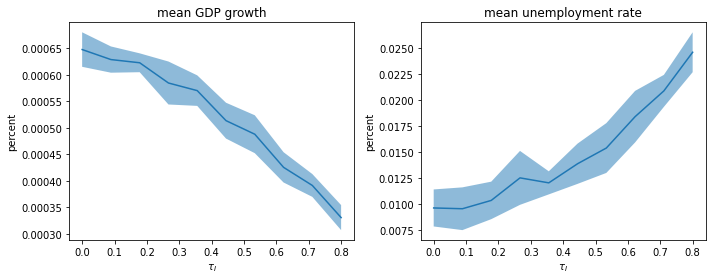

In [3]:
n_plot(
    'income', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_I$', '$\\tau_I$']
)

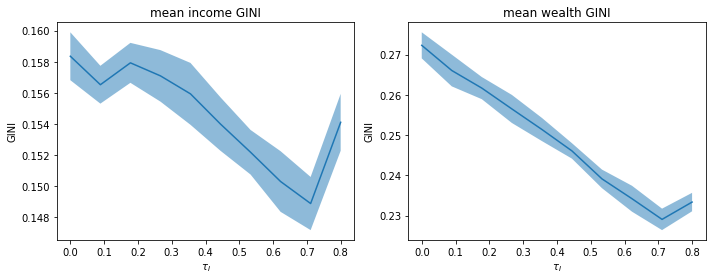

In [4]:
n_plot(
    'income', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_I$', '$\\tau_I$']
)

## Profit tax

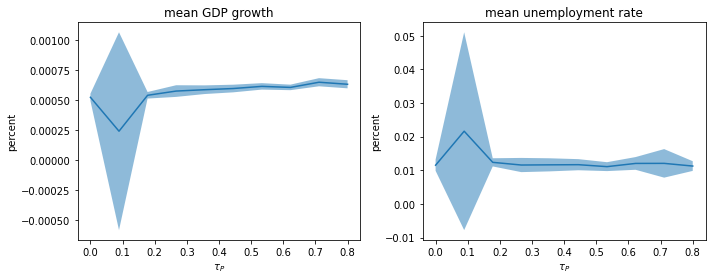

In [5]:
n_plot(
    'profit', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_P$', '$\\tau_P$']
)

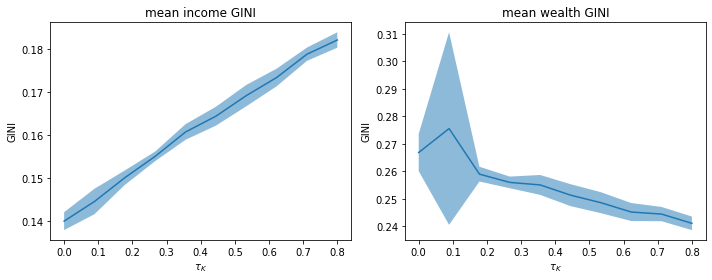

In [6]:
n_plot(
    'profit', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_K$', '$\\tau_K$']
)

## Capital Tax

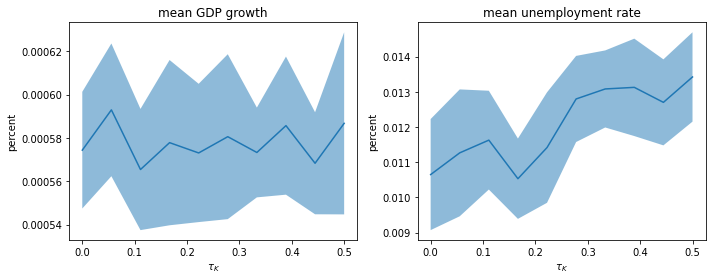

In [7]:
n_plot(
    'capital', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_K$', '$\\tau_K$']
)

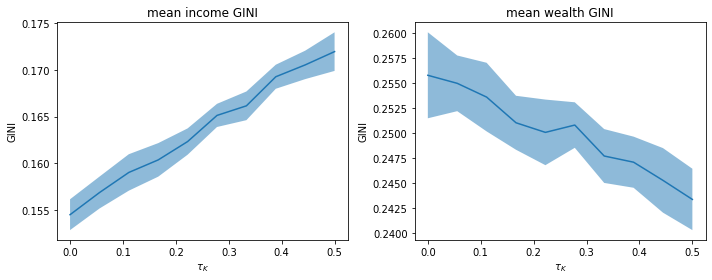

In [8]:
n_plot(
    'capital', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_K$', '$\\tau_K$']
)

## Carbon Tax

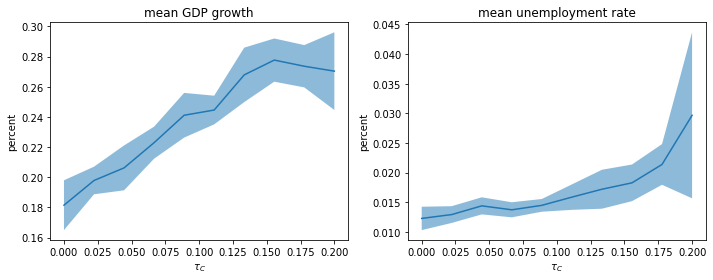

In [22]:
n_plot(
    'carbon', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_C$', '$\\tau_C$']
)

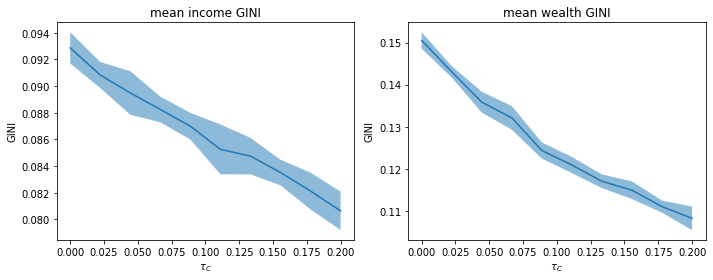

In [21]:
n_plot(
    'carbon', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_C$', '$\\tau_C$']
)

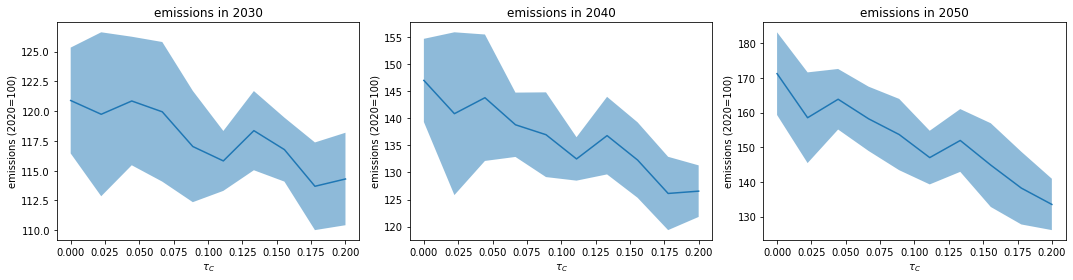

In [20]:
n_plot(
    'carbon', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_C$', '$\\tau_C$', '$\\tau_C$'],
    n=3
)

## Sales tax

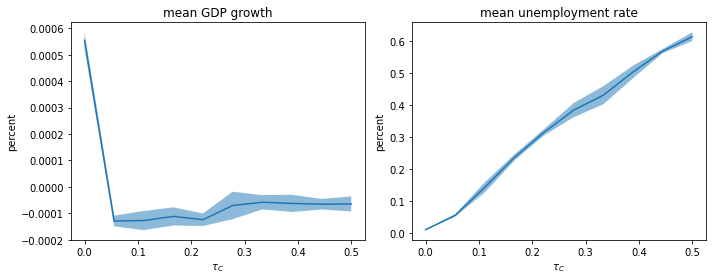

In [12]:
n_plot(
    'sales', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_C$', '$\\tau_C$']
)

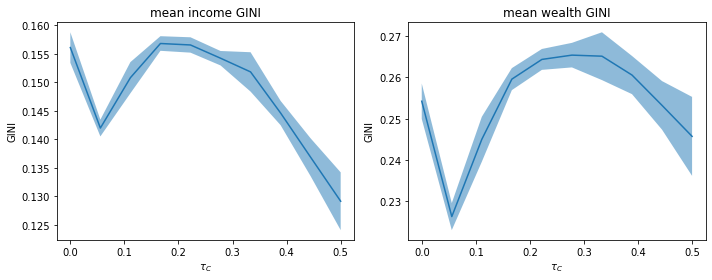

In [13]:
n_plot(
    'sales', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_C$', '$\\tau_C$']
)

## Energy tax

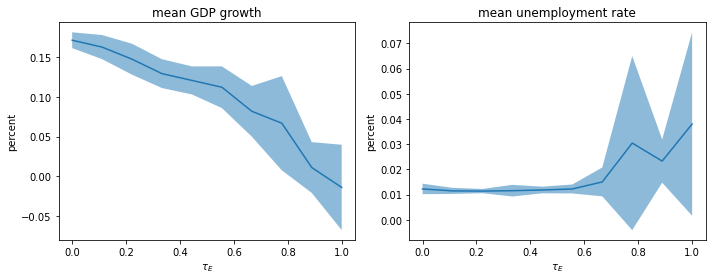

In [28]:
n_plot(
    'energy', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_E$', '$\\tau_E$']
)

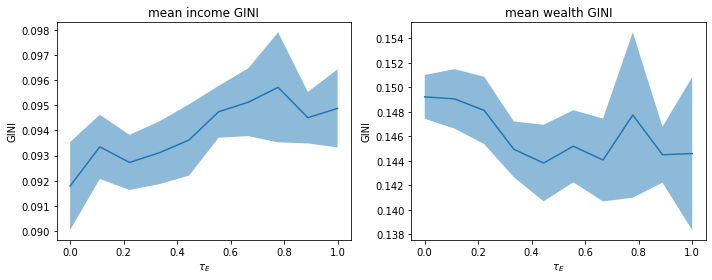

In [29]:
n_plot(
    'energy', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_E$', '$\\tau_E$']
)

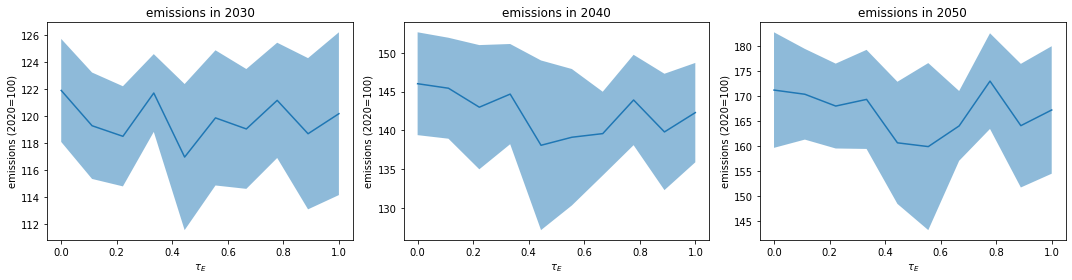

In [30]:
n_plot(
    'energy', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_E$', '$\\tau_E$', '$\\tau_E$'],
    n=3
)